<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task 1</a></span><ul class="toc-item"><li><span><a href="#Web-scraping-and-analysis" data-toc-modified-id="Web-scraping-and-analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Web scraping and analysis</a></span><ul class="toc-item"><li><span><a href="#Scraping-data-from-Skytrax" data-toc-modified-id="Scraping-data-from-Skytrax-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Scraping data from Skytrax</a></span></li></ul></li><li><span><a href="#EDA-and-Data-Cleaning" data-toc-modified-id="EDA-and-Data-Cleaning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>EDA and Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#2.-Preprocessing-the-Data" data-toc-modified-id="2.-Preprocessing-the-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>2. Preprocessing the Data</a></span><ul class="toc-item"><li><span><a href="#2.1.-Dealing-with-Missing-Values" data-toc-modified-id="2.1.-Dealing-with-Missing-Values-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>2.1. Dealing with Missing Values</a></span></li></ul></li></ul></li><li><span><a href="#3.-Visualizing-the-Data-with-WordClouds" data-toc-modified-id="3.-Visualizing-the-Data-with-WordClouds-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Visualizing the Data with WordClouds</a></span><ul class="toc-item"><li><span><a href="#4.-Sentiment-Analysis" data-toc-modified-id="4.-Sentiment-Analysis-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>4. Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#4.1.-Get-used-to-VADER-package" data-toc-modified-id="4.1.-Get-used-to-VADER-package-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>4.1. Get used to VADER package</a></span></li><li><span><a href="#4.2.-Calculating-Sentiment-Scores" data-toc-modified-id="4.2.-Calculating-Sentiment-Scores-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>4.2. Calculating Sentiment Scores</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [9]:
!pip install requests
!pip install nltk
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [10]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 200
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

   ---> 3454 total reviews
Scraping page 187
   ---> 3454 total reviews
Scraping page 188
   ---> 3454 total reviews
Scraping page 189
   ---> 3454 total reviews
Scraping page 190
   ---> 3454 total reviews
Scraping page 191
   ---> 3454 total reviews
Scraping page 192
   ---> 3454 total reviews
Scraping page 193
   ---> 3454 total reviews
Scraping page 194
   ---> 3454 total reviews
Scraping page 195
   ---> 3454 total reviews
Scraping page 196
   ---> 3454 total reviews
Scraping page 197
   ---> 3454 total reviews
Scraping page 198
   ---> 3454 total reviews
Scraping page 199
   ---> 3454 total reviews
Scraping page 200
   ---> 3454 total reviews


In [12]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."


In [13]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## EDA and Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3454 non-null   object
dtypes: object(1)
memory usage: 27.1+ KB


In [16]:
df['reviews'] = df["reviews"].str.replace("✅ Trip Verified","")
df['reviews']

0        |  Flew ATL to LHR 8th Jan 2023. Was unlucky ...
1       Not Verified |  Great thing about British Airw...
2       Not Verified | The staff are friendly. The pla...
3        | Probably the worst business class experienc...
4        | Definitely not recommended, especially for ...
                              ...                        
3449    YYZ to LHR - July 2012 - I flew overnight in p...
3450    LHR to HAM. Purser addresses all club passenge...
3451    My son who had worked for British Airways urge...
3452    London City-New York JFK via Shannon on A318 b...
3453    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3454, dtype: object

In [17]:
df['reviews'] = df["reviews"].str.replace("Not Verified","")
df['reviews']

0        |  Flew ATL to LHR 8th Jan 2023. Was unlucky ...
1        |  Great thing about British Airways A380 is ...
2        | The staff are friendly. The plane was cold,...
3        | Probably the worst business class experienc...
4        | Definitely not recommended, especially for ...
                              ...                        
3449    YYZ to LHR - July 2012 - I flew overnight in p...
3450    LHR to HAM. Purser addresses all club passenge...
3451    My son who had worked for British Airways urge...
3452    London City-New York JFK via Shannon on A318 b...
3453    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3454, dtype: object

In [18]:
df['reviews'] = df["reviews"].str.replace("✅ Verified Review","")
df['reviews']

0        |  Flew ATL to LHR 8th Jan 2023. Was unlucky ...
1        |  Great thing about British Airways A380 is ...
2        | The staff are friendly. The plane was cold,...
3        | Probably the worst business class experienc...
4        | Definitely not recommended, especially for ...
                              ...                        
3449    YYZ to LHR - July 2012 - I flew overnight in p...
3450    LHR to HAM. Purser addresses all club passenge...
3451    My son who had worked for British Airways urge...
3452    London City-New York JFK via Shannon on A318 b...
3453    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3454, dtype: object

In [19]:
df

,reviews
0,| Flew ATL to LHR 8th Jan 2023. Was unlucky ...
1,| Great thing about British Airways A380 is ...
2,"| The staff are friendly. The plane was cold,..."
3,| Probably the worst business class experienc...
4,"| Definitely not recommended, especially for ..."
...,...
3449,YYZ to LHR - July 2012 - I flew overnight in p...
3450,LHR to HAM. Purser addresses all club passenge...
3451,My son who had worked for British Airways urge...
3452,London City-New York JFK via Shannon on A318 b...


In [20]:
df.reviews[0]

' |  Flew ATL to LHR 8th Jan 2023. Was unlucky enough to be on board a 23 year old 777. Refit gave it a decent IFE screen and the seat looked decent. Although combine the IFE with the cheap and nasty earbuds, and any movie can be ruined. Headrest was great, just a pity little padding is used on the seat as my Wife and I were very uncomfortable. The leg room in general is poor, especially when passengers keep their seat reclined from start to finish. Zero room. Aircraft was tired. Rubber spacers falling out, silicone sealer falling apart in the toilets. Toilet seats old, stained. Rubber on arm rest was hanging off. No post take off drinks/snacks offered.  Meal was sent out after a couple of hours. Was poor. Chicken cubes that reminded me of dog food, mashed potatoes that were purified within an inch of their life. Stale rock hard roll, salad which was rice and carrots?! Dried crackers with no cheese. Kids meal was just as sad. Tiny leaf salad with enough dressing to refloat a shipwreck.

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

### 2. Preprocessing the Data 

#### 2.1. Dealing with Missing Values
<a id='2.1. Dealing with Missing Values'></a>

In [22]:
df.isnull().sum()

reviews    0
dtype: int64

In [23]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 3454 rows and 1 columns.


In [24]:
df.shape

(3454, 1)

In [25]:
df.reviews

0        |  Flew ATL to LHR 8th Jan 2023. Was unlucky ...
1        |  Great thing about British Airways A380 is ...
2        | The staff are friendly. The plane was cold,...
3        | Probably the worst business class experienc...
4        | Definitely not recommended, especially for ...
                              ...                        
3449    YYZ to LHR - July 2012 - I flew overnight in p...
3450    LHR to HAM. Purser addresses all club passenge...
3451    My son who had worked for British Airways urge...
3452    London City-New York JFK via Shannon on A318 b...
3453    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3454, dtype: object

## 3. Visualizing the Data with WordClouds
<a id='3. Visualizing the Data with WordClouds'></a>

**Preparing Steps**

In [28]:
# import necessary libraries
!pip install wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

  Using cached wordcloud-1.8.2.2-cp37-cp37m-win_amd64.whl (152 kB)


In [29]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Reviews from BA\n', fontsize=18, fontweight='bold')
    plt.show()

**English WordCloud**

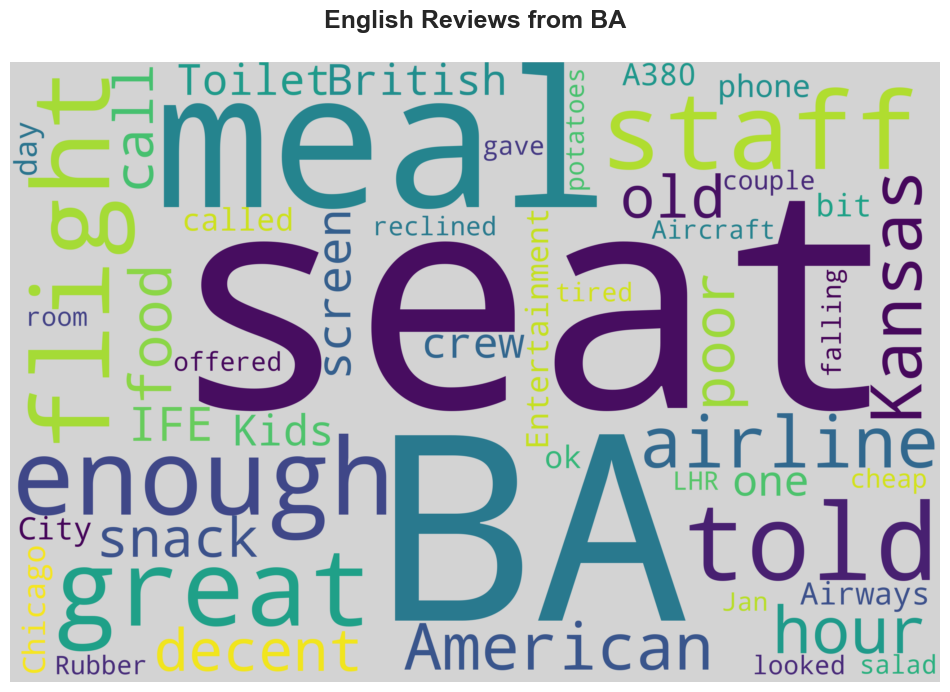

In [30]:
wordcloud = WordCloud(max_font_size=None, max_words=50,
                      background_color="lightgrey", 
                      width=3000, height=2000,collocations=False,
                      stopwords = stopwords.words('english'))

wordcloud.generate(str(df.reviews.values))

plot_wordcloud(wordcloud, 'English')


### 4. Sentiment Analysis
<a id='4. Sentiment Analysis'></a>

#### 4.1. Get used to VADER package
<a id='4.1. Get used to VADER package'></a>

In [32]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [33]:
## We will use the polarity_scores() method to obtain the polarity indices for the given sentence.

def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))


The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories.

> The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).


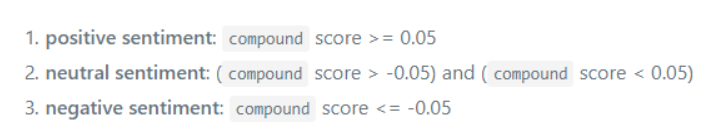

In [34]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

*Back to: <a href='#Table of contents'> Table of contents</a>*
#### 4.2. Calculating Sentiment Scores
<a id='4.2. Calculating Sentiment Scores'></a>

Let's now have VADER produce all four scores for each of our English-language comments. As this takes roughly a quarter of an hour, it's a good idea to save the dataframe.

In [35]:
df['reviews'].iloc[:2].apply(compound_score)

0   -0.9853
1    0.9022
Name: reviews, dtype: float64

In [36]:
%%time
df['sentiment_neg'] = df['reviews'].apply(negative_score)
df['sentiment_neu'] = df['reviews'].apply(neutral_score)
df['sentiment_pos'] = df['reviews'].apply(positive_score)
df['sentiment_compound'] = df['reviews'].apply(compound_score)

Wall time: 42.1 s


In [37]:
df['reviews'].apply(compound_score)

0      -0.9853
1       0.9022
2       0.3118
3      -0.9944
4      -0.7000
         ...  
3449    0.0933
3450    0.8720
3451    0.6640
3452    0.9148
3453    0.2244
Name: reviews, Length: 3454, dtype: float64

In [38]:
df.to_csv('Sentiment_BritishAirways.csv')

In [39]:
df = pd.read_csv('Sentiment_BritishAirways.csv', index_col=0)

In [40]:
df.columns

Index(['reviews', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos',
       'sentiment_compound'],
      dtype='object')

In [41]:
df.head(2)

,reviews,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,| Flew ATL to LHR 8th Jan 2023. Was unlucky ...,0.146,0.828,0.027,-0.9853
1,| Great thing about British Airways A380 is ...,0.060,0.832,0.108,0.9022


Let's investigate the distribution of all scores:

In [42]:
df['sentiment_compound'].value_counts(normalize=True)*100

 0.0000    0.231616
 0.9753    0.173712
-0.7096    0.173712
 0.9735    0.173712
 0.2732    0.173712
             ...   
 0.9425    0.028952
-0.7284    0.028952
-0.0929    0.028952
 0.6753    0.028952
 0.9148    0.028952
Name: sentiment_compound, Length: 2600, dtype: float64

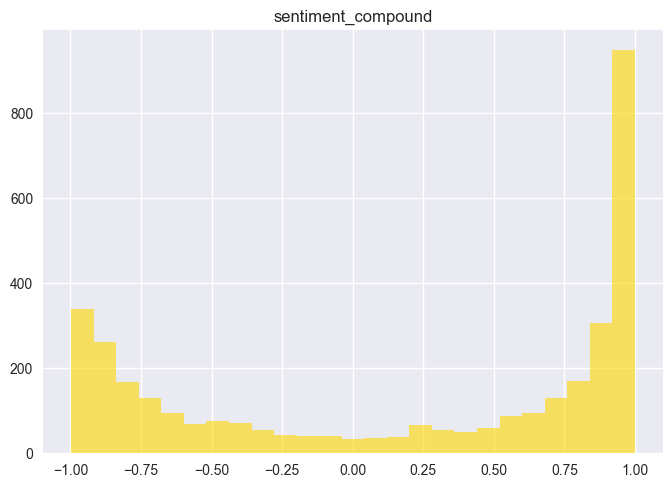

In [43]:
df.hist('sentiment_compound', bins=25, 
        color='gold', alpha=0.6);

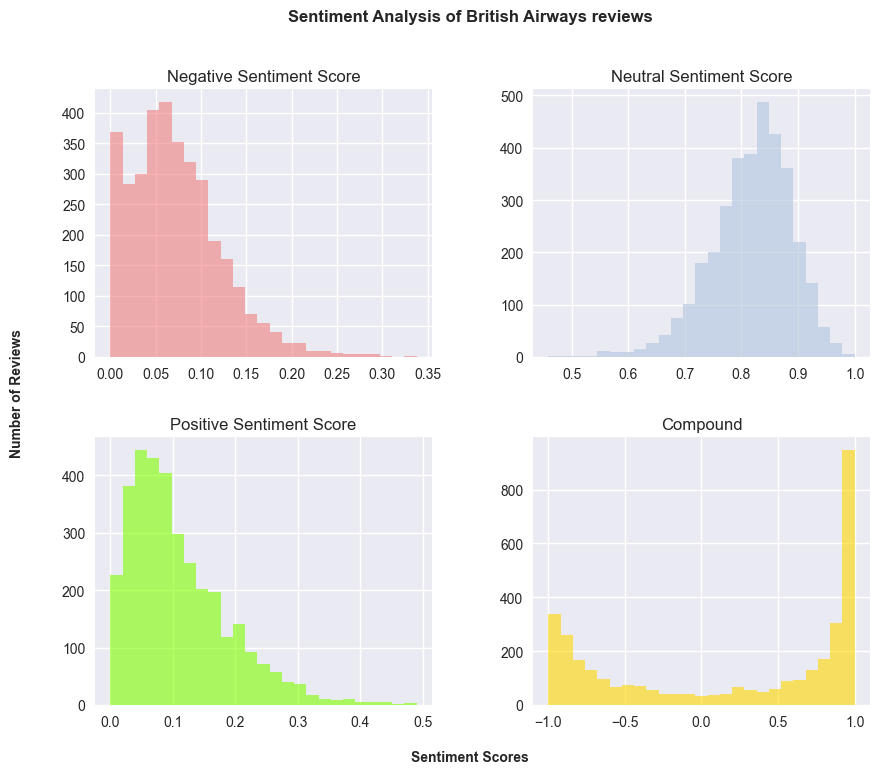

In [44]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', 
        alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')

df.hist('sentiment_neu', bins=25, ax=axes[0,1], 
        color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')

df.hist('sentiment_pos', bins=25, ax=axes[1,0], 
        color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')

df.hist('sentiment_compound', bins=25, ax=axes[1,1],
        color='gold', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of British Airways reviews\n\n', fontsize=12, fontweight='bold')
plt.savefig('Sentiment Analysis of British Airways reviews.png')

Remember what we said earlier: VADER produces four sentiment metrics from these word ratings (...). The first three - positive, neutral and negative - represent the **proportion of the text** that falls into those categories. (...). The final metric, **the compound score**, is the sum of all of the lexicon ratings which have been standardized to range between -1 and 1.


In [45]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]
df_pos
# only corpus of POSITIVE comments
pos_comments = df_pos['reviews'].tolist()
pos_comments

[' | I must admit like many others I tend to avoid BA long haul where possible due to the many poor reviews. But had my first ride on a BA A380 the other day so it was an exception. What can I say. Aircraft immaculate and economy seat really comfortable but that’s about it. IFE didn’t work but wasn’t that interesting anyway. I got the map screenshot for a while. Lunch was poor quality but plenty of nice white wine and other alcoholic drinks made up for it. Cabin crew pleasant but poor grooming lets them down. Some skirts, some trouser suits, some long sleeves some short. Some jackets some waistcoat. Some cardigans on at time and all in all they could have done better I think. Baggage delivery was really quick. Summing up well I am still not coming back to BA not yet. Maybe the old charm will return soon.',
 ' |  Boarding – at gate at LGW they called Group 1 to board (we were World Traveller Plus & Group 3), then called "anyone in Groups 2-6", whereupon everyone else surged forward. Why

In [46]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['reviews'].tolist()
neg_comments

[' |  Flew ATL to LHR 8th Jan 2023. Was unlucky enough to be on board a 23 year old 777. Refit gave it a decent IFE screen and the seat looked decent. Although combine the IFE with the cheap and nasty earbuds, and any movie can be ruined. Headrest was great, just a pity little padding is used on the seat as my Wife and I were very uncomfortable. The leg room in general is poor, especially when passengers keep their seat reclined from start to finish. Zero room. Aircraft was tired. Rubber spacers falling out, silicone sealer falling apart in the toilets. Toilet seats old, stained. Rubber on arm rest was hanging off. No post take off drinks/snacks offered.  Meal was sent out after a couple of hours. Was poor. Chicken cubes that reminded me of dog food, mashed potatoes that were purified within an inch of their life. Stale rock hard roll, salad which was rice and carrots?! Dried crackers with no cheese. Kids meal was just as sad. Tiny leaf salad with enough dressing to refloat a shipwreck

Let's compare the length of both positive and negative comments:

In [47]:
df_pos['text_length'] = df_pos['reviews'].apply(len)
df_neg['text_length'] = df_neg['reviews'].apply(len)

In [48]:
df_neg['text_length']

0       1480
3       3412
4        785
8        986
9        784
        ... 
3437     784
3443     902
3444    1136
3446     670
3447    1325
Name: text_length, Length: 1390, dtype: int64

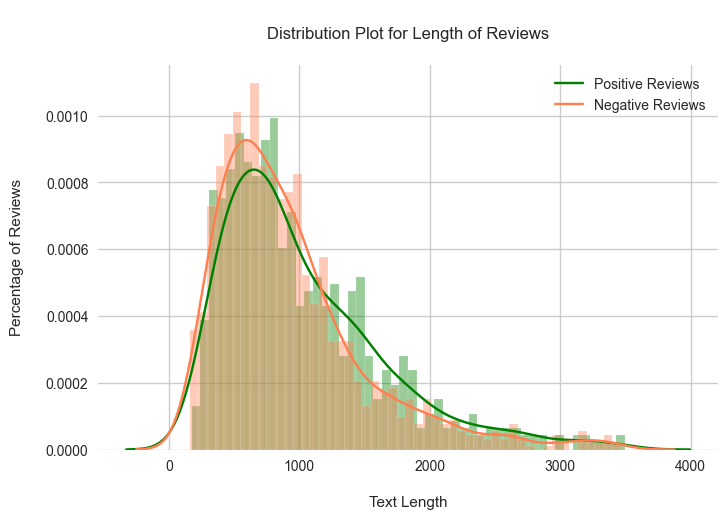

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='green')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='coral')

plt.title('\nDistribution Plot for Length of Reviews\n')
plt.legend(['Positive Reviews', 'Negative Reviews'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Reviews\n');
plt.savefig('Distribution Plot for Length of Reviews.png')

The mode for the text length of positive comments can be found more to the right than for the negative comments, which means most of the positive comments are longer than most of the negative comments.

In [50]:
# read some positive comments
pos_comments[10:15]

[" |  DFW-LHR. Had an easy transfer at DFW from American Airlines to British Airways heading to London. First ride on an A380 left me with the feeling that this plane type won't ever be my first choice. Was seated upstairs where the cabin space seemed very roomy, but the seats and rows were very cramped. When the passenger in front reclined the back of the seat was 7 inches from my face and I had a real difficult time trying to view the seat back entertainment screen. The seat itself wasn't too bad but I felt squished and locked in. On a plus side, having a window seat gave me this nice storage area by my side. Ground staff were pleasant and cabin crew were really nice. Plenty of beverages offered and multiple water runs were made during the night. Dinner was rubbish as was the morning pre-landing snack. The entertainment system was very responsive and had a pretty good selection of movies, tv, music and games. All in all it was an OK experience and did get me to London on time and our

In [51]:
# read some negative comments
neg_comments[10:15]

[' |  Missing baggage customer service was the worst I’ve ever experienced. I arrived back in Phoenix on Sunday evening and air tags showed my bags arrived on Monday, but it took three more days before they were finally delivered. I understood that due to delays caused by freezing fog in London my luggage did not make it onto my final flight. I filled out the required form at the Phoenix airport and then attempted to fill one out online where I received a message saying that the bags had already been reported missing and to enter the tracking code that had been sent to me via email, but no email was received. I made phone calls daily and was told a message was sent and I should hear back within 24 hours. Finally the email with the tracking number was received on Tuesday night. I went online with the tracking number on Wednesday and it requested that I provide the same information that I had given them on the form at the airport. My luggage was finally delivered on Thursday afternoon. '

**WordCloud**

After reading some of these reviews to get a feeling for what clients applaud or complain about, WordClouds are a great tool to help us peek behind the curtain:

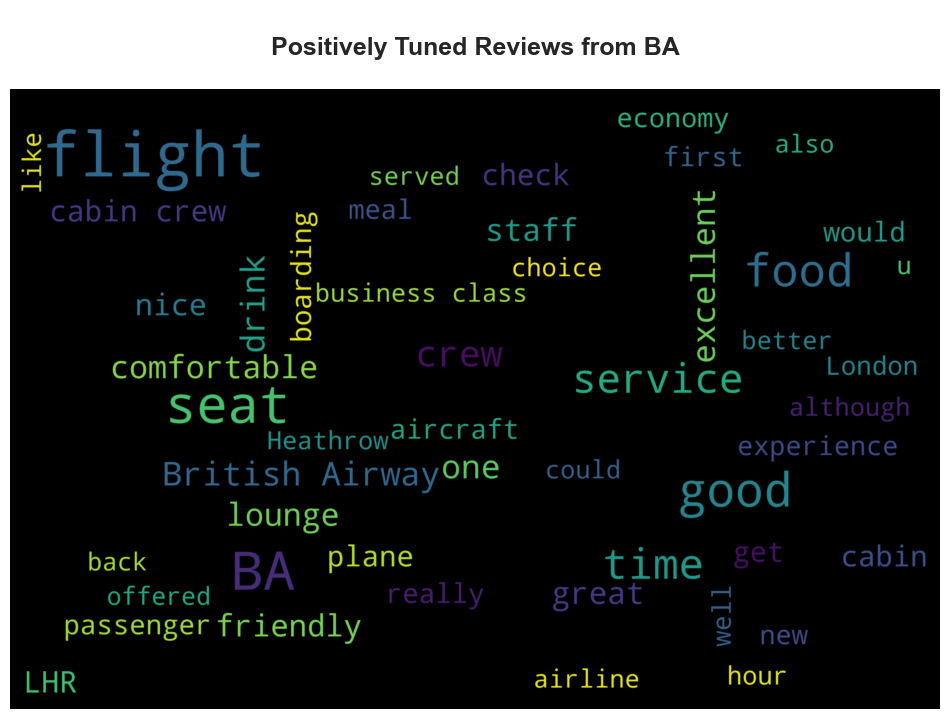

<Figure size 800x550 with 0 Axes>

In [52]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="black",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.reviews.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')
plt.savefig('World Cloud POS.png')

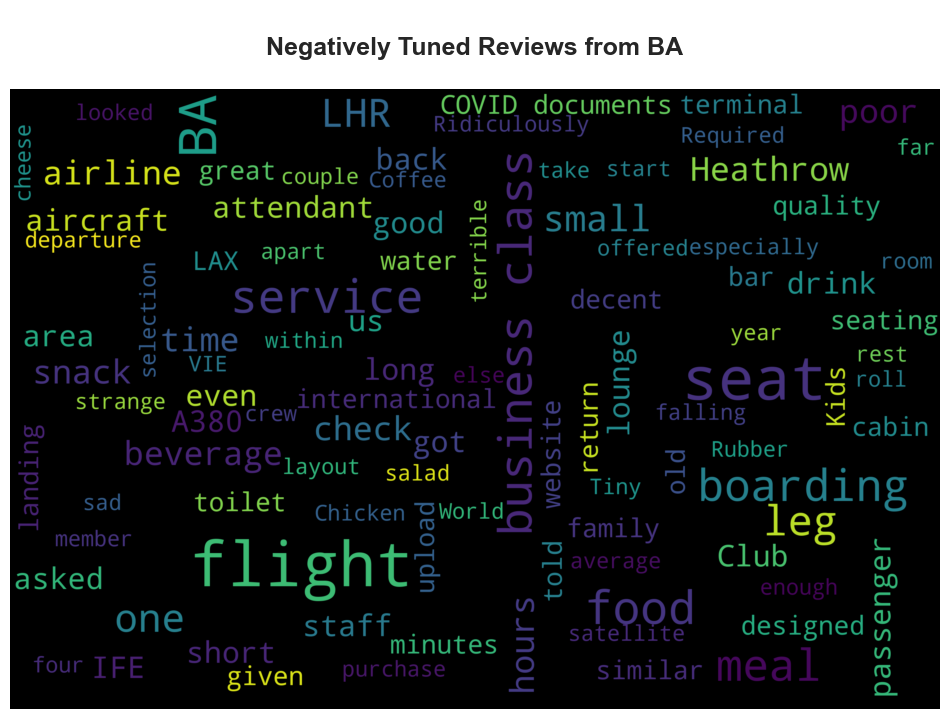

<Figure size 800x550 with 0 Axes>

In [53]:
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="black",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.reviews.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')
plt.savefig('World Cloud NEG.png')

**Frequency Distribution**

Another method for visually exploring text is with frequency distributions. In the context of a text corpus, such a distribution tells us the prevalence of certain words. Here we use the Yellowbrick library.

In [54]:
#!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [55]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

In [56]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
docs
features = vectorizer.get_feature_names()

In [57]:
#vectorizer.get_feature_names()

In [58]:
#features
docs

<1390x9056 sparse matrix of type '<class 'numpy.int64'>'
	with 89144 stored elements in Compressed Sparse Row format>

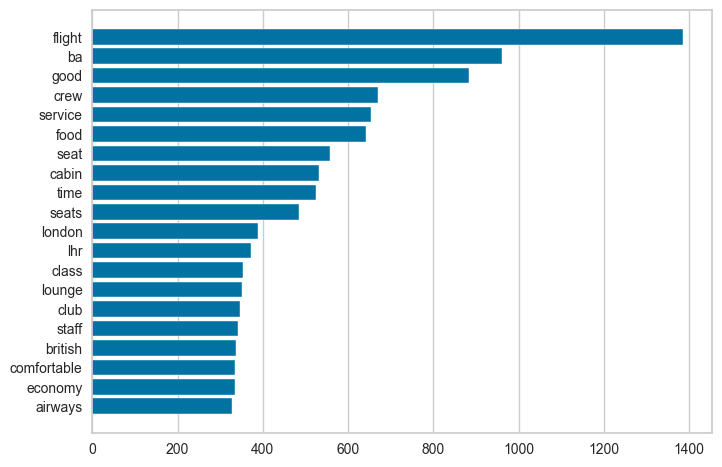

In [62]:
visualizer = FreqDistVisualizer(features=features, n=20)
visualizer.fit(docs)
visualizer.poof
plt.savefig('Freq_word_reviews.png')

In [60]:
docs = vectorizer.fit_transform(pos_comments)
docs
features = vectorizer.get_feature_names()

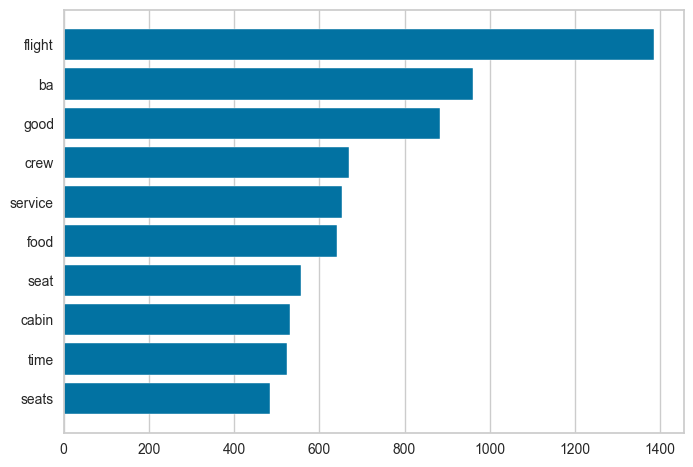

In [61]:
visualizer = FreqDistVisualizer(features=features, n=10)
visualizer.fit(docs)
visualizer.poof;